<a href="https://colab.research.google.com/github/GeminiNetSailor/Data-science-and-analytics/blob/Actividad-5/Test/Actividad8RLineal_Equipo04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: David A. Serrano Garcia
*   MATRÍCULA: A01795935
*   NOMBRE: Said Chávez Cervantes
*   MATRÍCULA: A01114101
*   NOMBRE: Erik Abel Cruz Yekon
*   MATRÍCULA: A01795929

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Define enviroments constant names
DEFAULT = 'DEFAULT'
VARIANT = 'VARIANT'

# Define the environment settings in a dictionary
ENVIRONMENTS_CONFIG = {
    DEFAULT: {
        'base_path': '/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal'
    },
    VARIANT: {
        'base_path': '/content/drive/MyDrive/Colab Notebooks/Maestría MNA/Ciencia y Analítica de datos'
    }
}

In [28]:
# Descomenta la configuración que vas a usar.
environment = DEFAULT
#environment = VARIANT

In [29]:
base_path = ENVIRONMENTS_CONFIG[environment]['base_path']

In [30]:
import os
DIR = base_path
os.chdir(DIR)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score

In [32]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [33]:
#dfn = insurance_df.select_dtypes(include=np.number).columns.tolist()
#dfc = insurance_df.select_dtypes(exclude=np.number).columns.tolist()

In [34]:
# Cambiado el nombre de la variable 'dfn' a 'insurance_df_numerical_cols_list' para mayor claridad y ser más descriptivos.
# Selecciona las columnas numéricas del DataFrame
insurance_df_numerical_cols_list = insurance_df.select_dtypes(include=np.number).columns.tolist()

# Cambiado el nombre de la variable 'dfc' a 'insurance_df_categorical_cols_list' para mayor claridad y ser más descriptivos.
# Selecciona las columnas categóricas del DataFrame (excluyendo las numéricas)
insurance_df_categorical_cols_list = insurance_df.select_dtypes(exclude=np.number).columns.tolist()

In [35]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
insurance_df.describe(include = 'object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [37]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


1b) Búsqueda de valores faltantes.

In [38]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

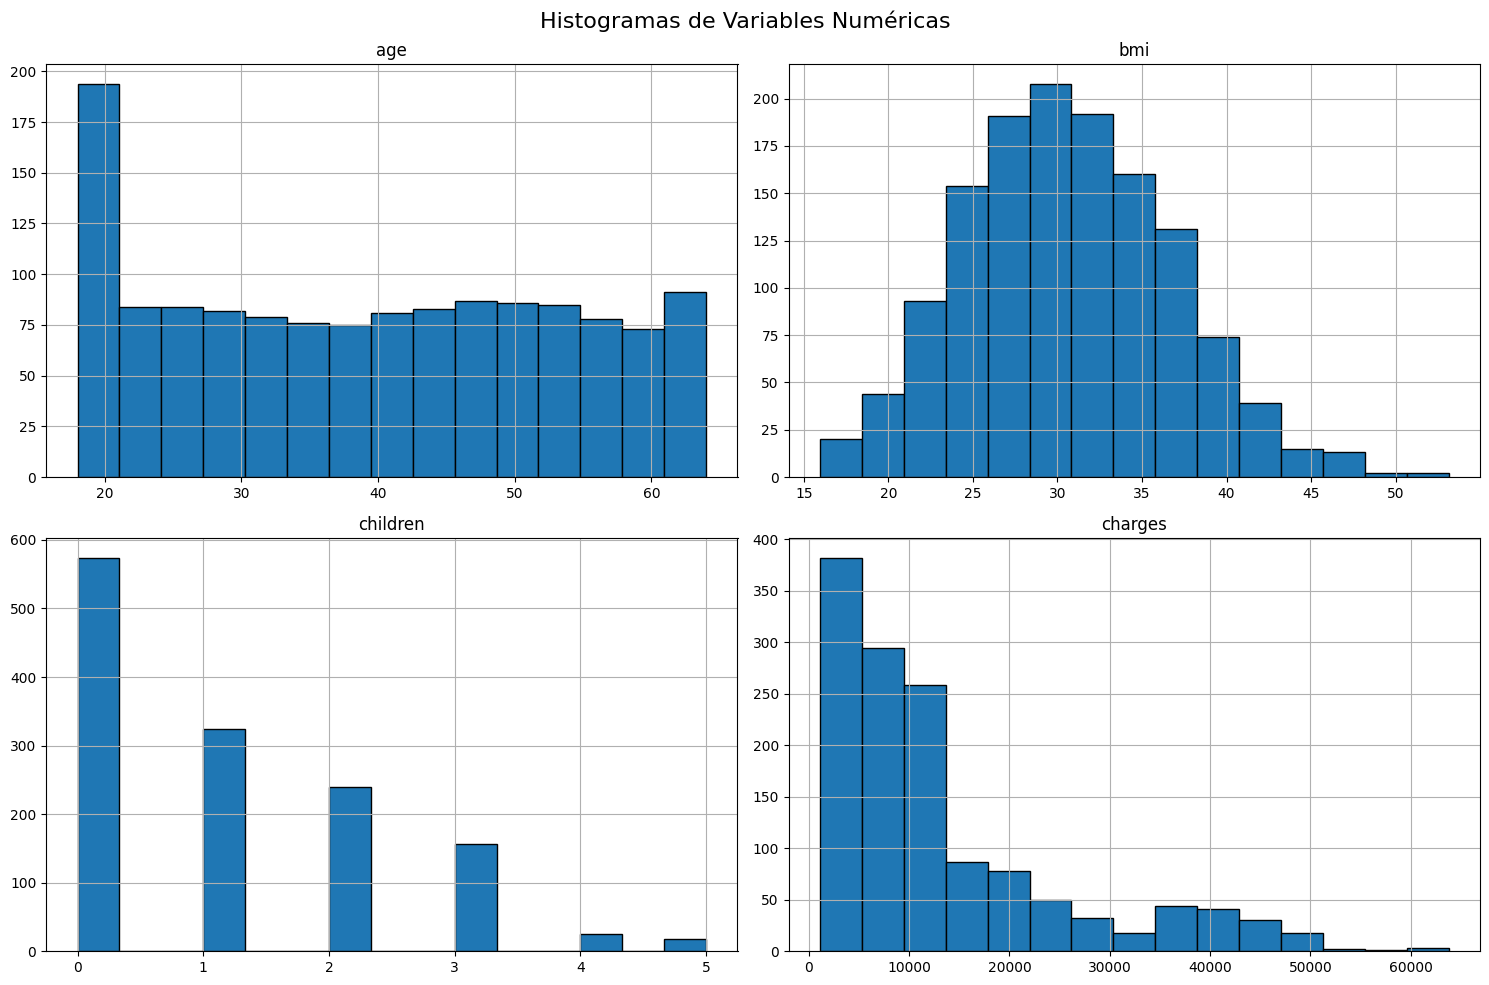

In [39]:
insurance_df[insurance_df_numerical_cols_list].hist(figsize=(15, 10), bins=15, edgecolor='black')
plt.suptitle('Histogramas de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

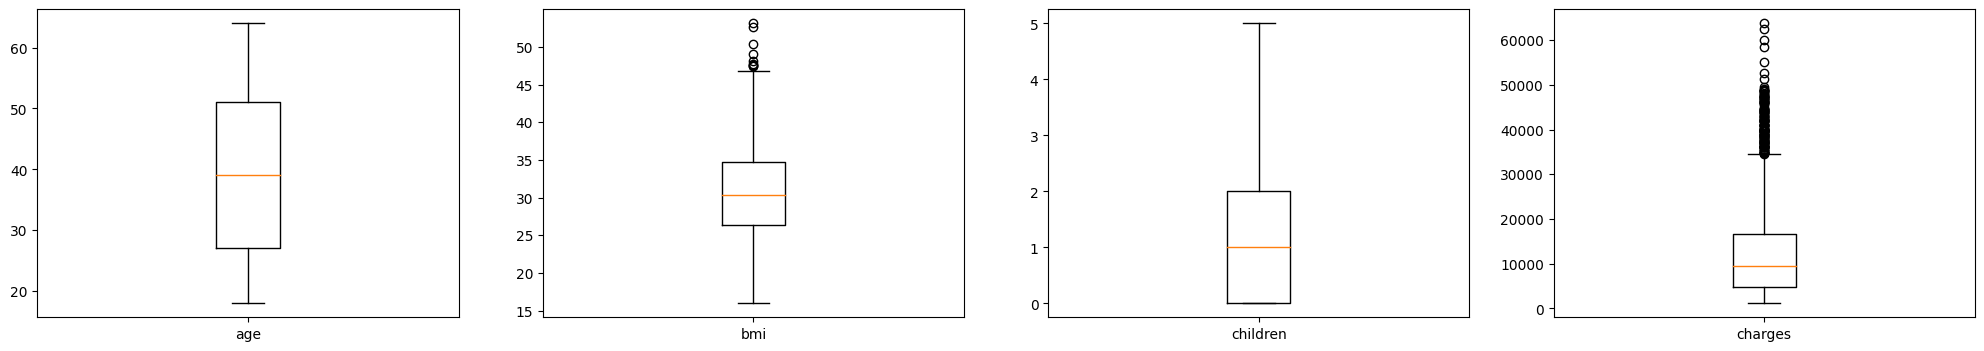

In [40]:
fig, axes = plt.subplots(1,len(insurance_df_numerical_cols_list), figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(insurance_df[insurance_df_numerical_cols_list], axes):
  ax.boxplot(insurance_df[col].dropna(), labels=[f'{col}'])

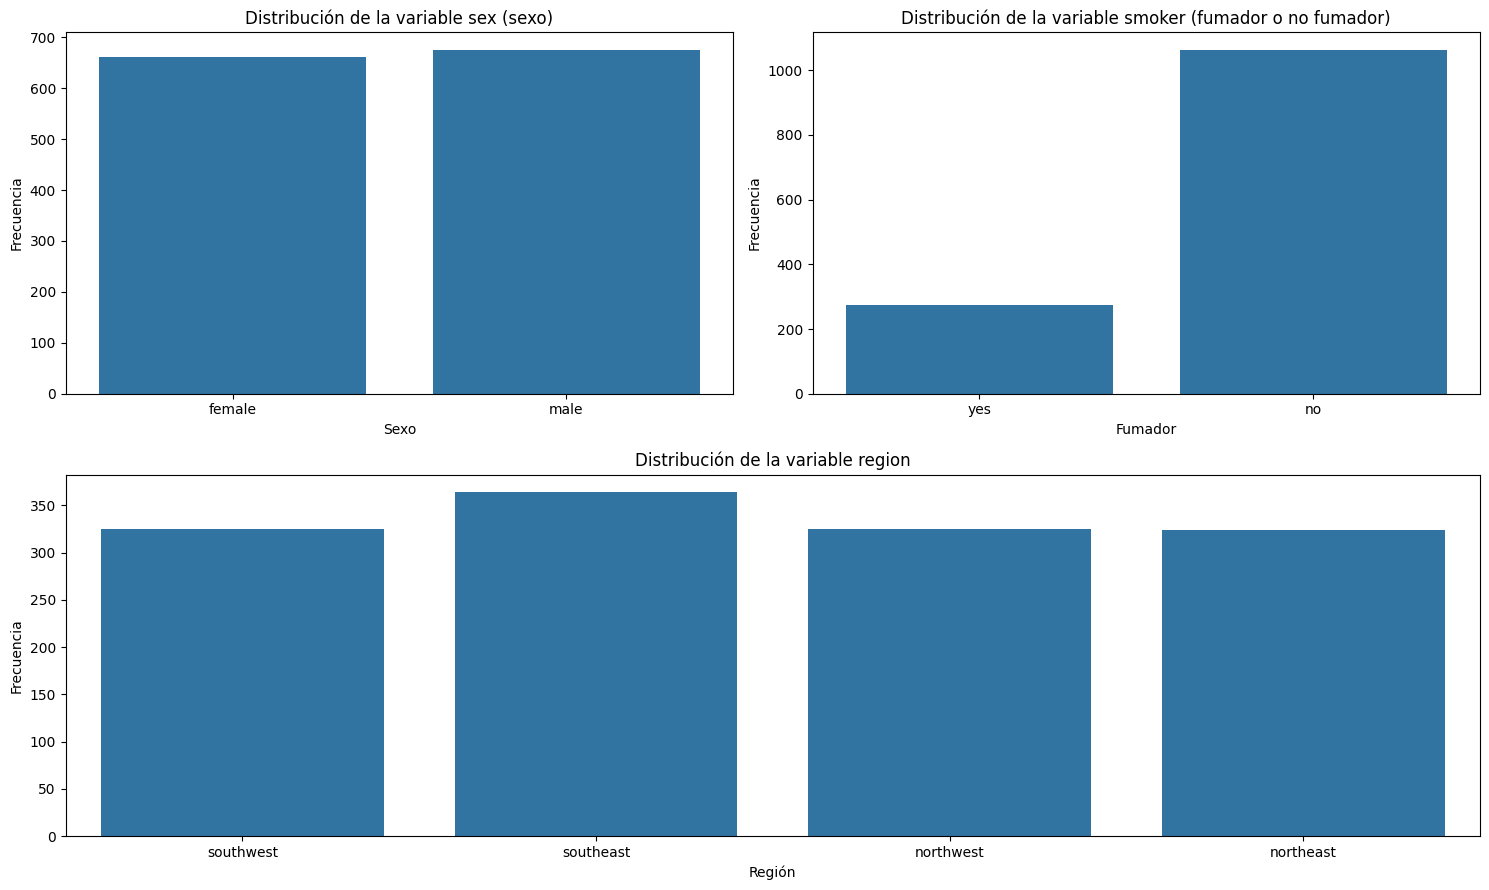

In [41]:
plt.figure(figsize=(15, 9))

plt.subplot(2, 2, 1)
sns.countplot(data=insurance_df, x='sex')
plt.title('Distribución de la variable sex (sexo)')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.countplot(data=insurance_df, x='smoker')
plt.title('Distribución de la variable smoker (fumador o no fumador)')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')

plt.subplot(2, 1, 2)
sns.countplot(data=insurance_df, x='region')
plt.title('Distribución de la variable region')
plt.xlabel('Región')
plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

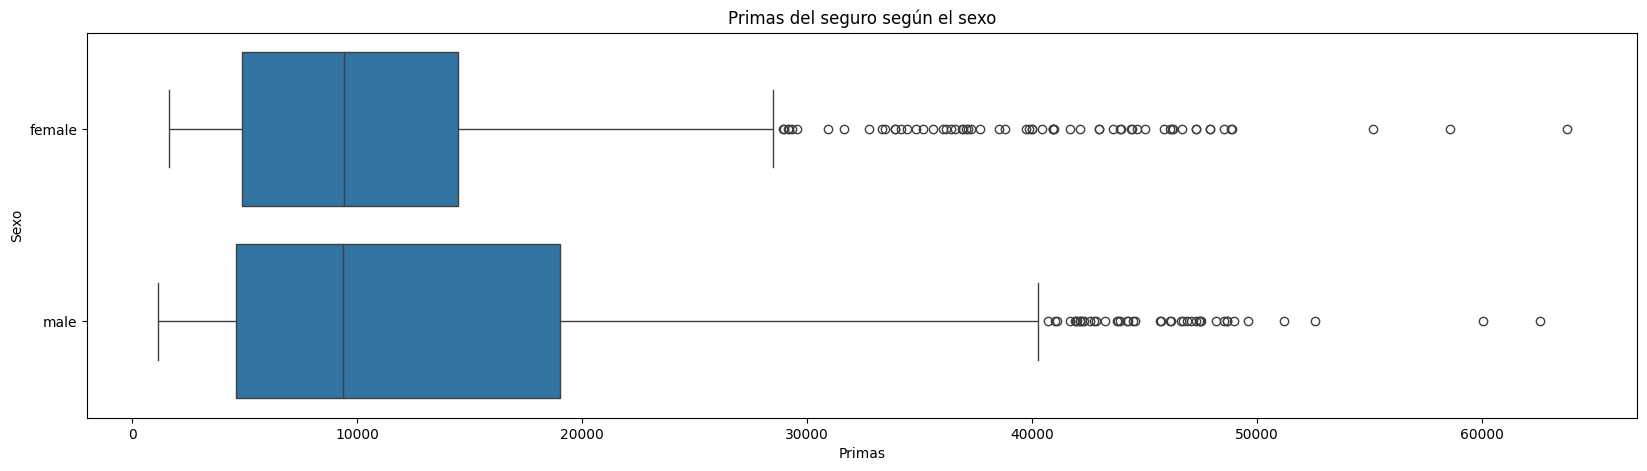

In [42]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=insurance_df['charges'], y=insurance_df['sex'])
plt.xlabel('Primas')
plt.ylabel('Sexo')
plt.title('Primas del seguro según el sexo')
plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

**Se puede observar que, en términos generales, las primas del seguro más altas son para aquellas personas que sí fuman y la tendencia es al alza, mientras mayor sea el índice de masa corporal, mientras que la cantidad de hijos no representa un indicador que tenga una fuerte correlación con una mayor o menor prima, ya que se mantiene distribuido de manera uniforme a medida que se avanza en el índice de masa corporal.**

In [260]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from matplotlib.lines import Line2D
from IPython.display import HTML

In [261]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(15, 10))

# Crear un diccionario para almacenar los scatter plots por categoría
scatter_plots = {
    'children': {}
}

# Definir una paleta de colores y tamaño de los marcadores
marker_styles = {'yes': 'o', 'no': 'x'}  # Definir estilos para los valores de 'smoker'
palette = sns.color_palette('colorblind', len(insurance_df['children'].unique()))
marker_size = 50
alpha = 0.6

# Crear un scatter plot separado para cada combinación de children y smoker
for i, children_category in enumerate(sorted(insurance_df['children'].unique())):
    scatter_plots['children'][children_category] = []
    for smoker_status in insurance_df['smoker'].unique():
        subset = insurance_df[(insurance_df['children'] == children_category) & (insurance_df['smoker'] == smoker_status)]
        scatter = ax.scatter(
            subset['bmi'],
            subset['charges'],
            label=f'children={children_category}, smoker={smoker_status}',
            c=[palette[i]] * len(subset),
            s=marker_size,
            alpha=0.0,  # Iniciar con todos los puntos ocultos
            marker=marker_styles[smoker_status]
        )
        scatter_plots['children'][children_category].append(scatter)  # Almacenar la colección

plt.title('Dispersión de primas del seguro según el índice de masa corporal, cantidad de hijos y hábitos de fumar')
plt.xlabel('Índice de masa corporal')
plt.ylabel('Primas del seguro')
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Smoker: Yes', markerfacecolor='k', markersize=10),
    Line2D([0], [0], marker='X', color='w', label='Smoker: No', markerfacecolor='k', markersize=10)
]

ax.legend(handles=legend_elements, loc='upper right')

num_categories = len(scatter_plots['children'])
total_frames = num_categories + 2  # 5 segundos a 30 fps

# Función de inicialización: oculta todos los puntos de dispersión
def init():
    for category, scatters in scatter_plots['children'].items():
        for scatter in scatters:
            scatter.set_alpha(0.4)
            scatter.set_visible(False)
    return [scatter for category in scatter_plots['children'] for scatter in scatter_plots['children'][category]]

# Función para actualizar la visibilidad de cada categoría en cada cuadro
def update(frame):
    # print("Frame:", frame)
    if frame == 0:
        return []

    if frame == total_frames - 1:
        for category, scatters in scatter_plots['children'].items():
            for scatter in scatters:
                scatter.set_alpha(0.6)
                scatter.set_visible(True)
        return [scatter for category in scatter_plots['children'] for scatter in scatter_plots['children'][category]]

    current_category_index = frame - 1  # Ajustar el índice para que empiece desde 0

    for index, key in enumerate(scatter_plots['children']):
        for scatter in scatter_plots['children'][key]:
            scatter.set_alpha(0.2)
        if index == current_category_index:
            current_category = key
            break

    for scatter in scatter_plots['children'][current_category]:
        scatter.set_alpha(1)
        scatter.set_visible(True)

    # print(current_category_index, "->", current_category)
    new_label = f'{current_category} Hijos'
    if not any(item.get_label() == new_label for item in legend_elements):
        legend_elements.append(
            Line2D([0], [0], marker='o', color='w', label=new_label,
                   markerfacecolor=palette[current_category_index], markersize=10)
        )
    ax.legend(handles=legend_elements, loc='upper right')

    return [scatter for category in scatter_plots['children']]

# Crear la animación
anim = FuncAnimation(fig,
                     update,
                     init_func=init,
                     frames=total_frames,
                     blit=True,
                     interval=1000  # 25 frames in one millisecond
                     )

# Hacer que funcione en Colab
rc('animation', html='jshtml')

plt.close(fig)  # Cierra la figura para evitar mostrar la imagen estática

# Mostrar la animación
HTML(anim.to_jshtml())
# HTML(anim.to_html5_video())

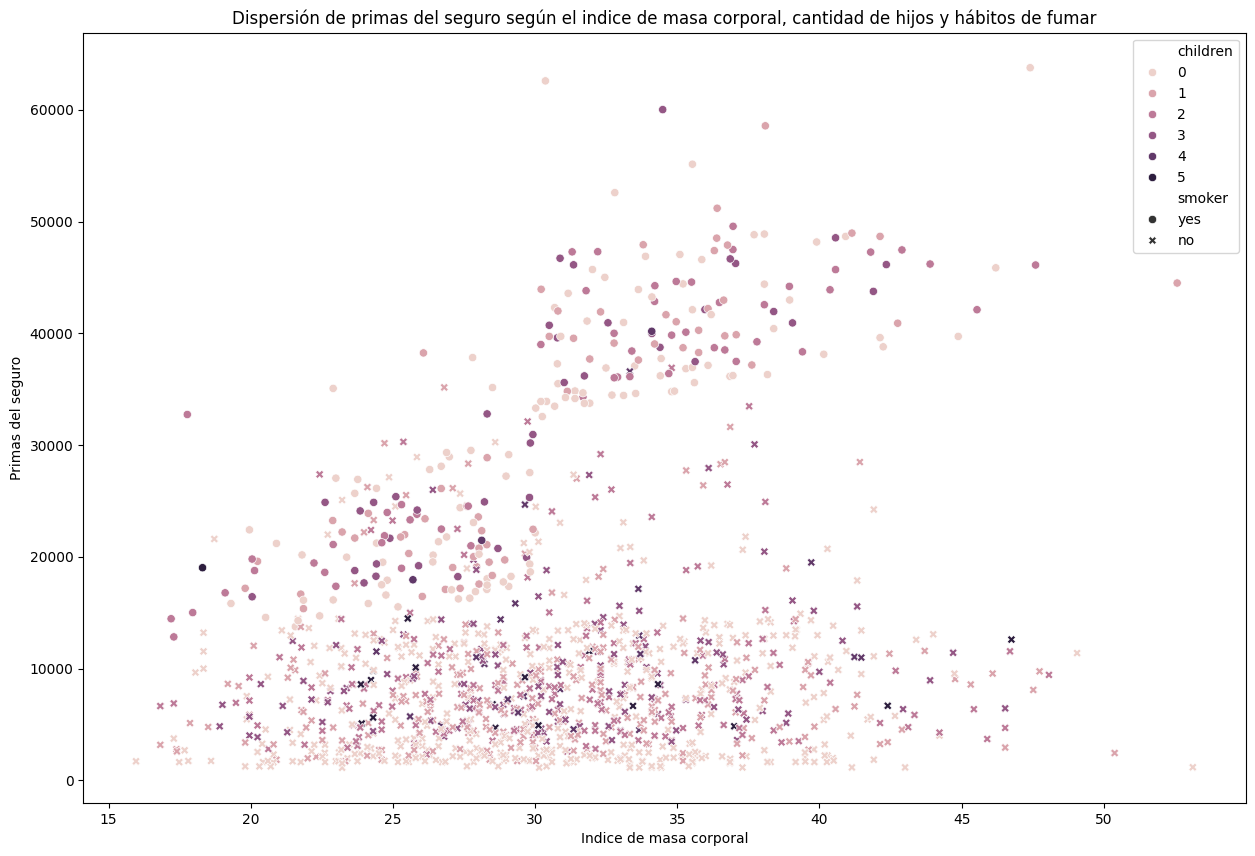

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='children', style='smoker')
plt.title('Dispersión de primas del seguro según el indice de masa corporal, cantidad de hijos y hábitos de fumar')
plt.xlabel('Indice de masa corporal')
plt.ylabel('Primas del seguro')
plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

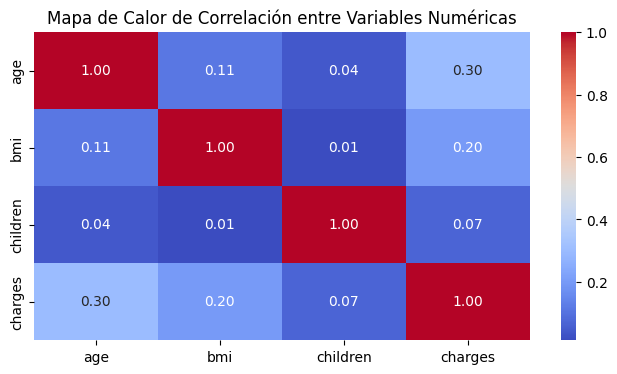

In [22]:
plt.figure(figsize=(8, 4))
correlation_matrix = insurance_df[insurance_df_numerical_cols_list].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [ ]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
ls = Q3 + 1.5 * IQR
li = Q1 - 1.5 * IQR
vac = insurance_df[(insurance_df['charges']  < li) | (insurance_df['charges'] > ls)]
print("El recuento de valores atípicos en la variable charges es: ",vac['charges'].count())
vac

El recuento de valores atípicos en la variable charges es:  139


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
vac.describe().T

,count,mean,std,min,25%,50%,75%,max
age,139.0,41.079137,13.801420,18.00000,30.00000,43.0000,52.500000,64.00000
bmi,139.0,35.564604,4.434917,22.89500,32.66750,35.2000,37.660000,52.58000
children,139.0,1.187050,1.126546,0.00000,0.00000,1.0000,2.000000,4.00000
charges,139.0,42103.947206,5582.168107,34617.84065,37786.14995,40974.1649,45786.706425,63770.42801


In [ ]:
print("El promedio de edad para los valores atípicos en las primas del seguro es",vac['age'].mean())

El promedio de edad para los valores atípicos en las primas del seguro es 41.07913669064748


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

**El porcentaje de hombres para los valores atípicos en las primas del seguro es:  64.03%**

**El porcentaje de mujeres para los valores atípicos en las primas del seguro es:  35.97%**

**El porcentaje de fumadores para los valores atípicos en las primas del seguro es:  97.84%**

**El porcentaje de no fumadores para los valores atípicos en las primas del seguro es:  2.16%**

In [ ]:
vac.describe(include = 'object').T

,count,unique,top,freq
sex,139,2,male,89
smoker,139,2,yes,136
region,139,4,southeast,57


In [ ]:
va_male = (vac['sex']=="male").sum()/vac['sex'].count()
va_female = (vac['sex']=="female").sum()/vac['sex'].count()
print("El porcentaje de hombres para los valores atípicos en las primas del seguro es",va_male*100,"%")
print("El porcentaje de mujeres para los valores atípicos en las primas del seguro es",va_female*100,"%")

El porcentaje de hombres para los valores atípicos en las primas del seguro es 64.02877697841727 %
El porcentaje de mujeres para los valores atípicos en las primas del seguro es 35.97122302158273 %


In [ ]:
va_sy = (vac['smoker']=="yes").sum()/vac['smoker'].count()
va_sn = (vac['smoker']=="no").sum()/vac['smoker'].count()
print("El porcentaje de fumadores para los valores atípicos en las primas del seguro es",va_sy*100,"%")
print("El porcentaje de no fumadores para los valores atípicos en las primas del seguro es",va_sn*100,"%")

El porcentaje de fumadores para los valores atípicos en las primas del seguro es 97.84172661870504 %
El porcentaje de no fumadores para los valores atípicos en las primas del seguro es 2.158273381294964 %


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
X = insurance_df.drop('charges', axis = 1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)

print('The Root Mean Square Error (RMSE) is:', mean_squared_error(ytest, predictions, squared=False))
print('The R square (R2) is:', r2_score(ytest, predictions))

The Root Mean Square Error (RMSE) is: 5956.454717976427
The R square (R2) is: 0.7623311844057112


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.